# Data Cleaning
The process of cleaning the data began with importing the CSV file and creating a pandas DataFrame from it. Then I dropped the unnecessary "objid" column, checked for nonsensical values and dropped rows with such values.

In [1]:
import numpy as np, pandas as pd
import seaborn as sns
# import necessary libraries including seaborn for visualizing data

In [2]:
galaxies = pd.read_csv("../data/sdss.csv", index_col=False)
# read in CSV and assign it to a DataFrame

In [3]:
galaxies.columns
# remind me what the column names are

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift'], dtype='object')

In [4]:
galaxies.drop(columns="objid", inplace=True)
# ojbid is an internal database identifier, not a astronomical catalogue number, so it serves no use here; rather than gathering the data all over again,
# it's quicker to drop it

In [5]:
galaxies.columns
# check the column names again to make sure it worked

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift'], dtype='object')

In [6]:
galaxies.dtypes
# check data types

ra          float64
dec         float64
u           float64
g           float64
r           float64
i           float64
z           float64
redshift    float64
dtype: object

In [7]:
galaxies.isna().sum()
# check for null values

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
redshift    0
dtype: int64

In [16]:
for col in galaxies.columns:
    print(col, galaxies[col].min(), galaxies[col].max())
# look for outliers

ra 5.60266716645265 358.99865370510804
dec -10.4016874552715 68.542265413034
u -9999.0 29.53323
g -9999.0 27.441990000000004
r 11.9385 23.54663
i 11.535730000000001 24.43609
z -9999.0 28.234509999999997
redshift -0.01093198 2.002617


In [32]:
placeholders = galaxies[
    (galaxies["u"] == -9999.0) |
    (galaxies["g"] == -9999.0) |
    (galaxies["r"] == -9999.0) |
    (galaxies["i"] == -9999.0) |
    (galaxies["z"] == -9999.0)
]

placeholders.shape[0]
# see how many rows have a placeholder value for any of the magnitudes

10

In [33]:
galaxies = galaxies[
    (galaxies["u"] != -9999.0) &
    (galaxies["g"] != -9999.0) &
    (galaxies["r"] != -9999.0) &
    (galaxies["i"] != -9999.0) &
    (galaxies["z"] != -9999.0)
]
# drop the 10 rows with placeholder values for the magnitudes

In [22]:
galaxies[galaxies["redshift"] <= 0].shape[0]
# see how many rows have negative or 0 redshift (blueshift)

531

In [35]:
galaxies = galaxies[galaxies["redshift"] > 0]
# drop rows  with redshift <= 0, which indicates that they are very nearby
# should improve model performance for more distant (higher redshift) galaxies

<Figure size 720x720 with 0 Axes>

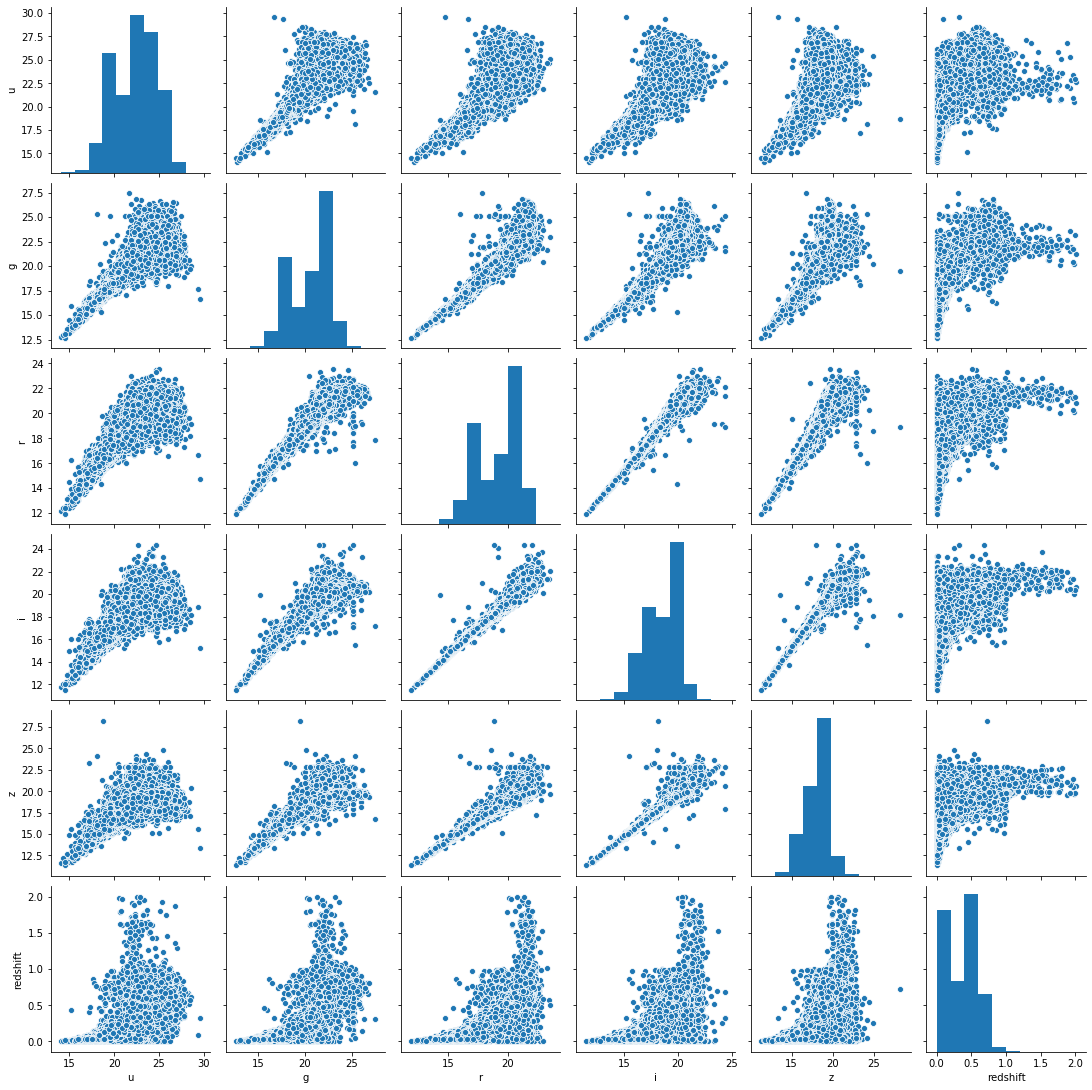

In [40]:
galaxies_reduced = galaxies.drop(columns=["ra", "dec"])
# create a DataFrame with only magnitude and redshift measurements
plt.figure(figsize=(10,10))
sns.pairplot(galaxies_reduced);
# make scatterplots to examine relations among features (magnitudes) and target (redshift) and check for outliers

There appeared to be one galaxy with an extremely high magnitude in the z band (~28). I considered it an outlier and dropped it. The pairplot didn't show other outliers quite as clearly, but I found them by looking at the list of highest values for each magnitude measurement in descending order and dropped them. I also looked at the lower end of each column but didn't find any outliers. The very high values of the outliers don't necessarily indicate an inaccuracy in the measurements or a problem with the data, but they will still negatively affect the performance of the models, so I didn't feel that they should be included.

In [50]:
for col in galaxies_reduced.columns:
    print(galaxies_reduced[col].sort_values(ascending=False)[:5])
    print()
# check the 5 highest values of each column

73900    29.53323
6380     29.35055
67629    28.53299
97858    28.45070
55253    28.31311
Name: u, dtype: float64

99474    27.44199
81095    26.84091
10295    26.75811
74397    26.61088
74890    26.52988
Name: g, dtype: float64

26401    23.54663
2630     23.49591
67134    23.29510
96864    22.98671
67139    22.96423
Name: r, dtype: float64

8664     24.36430
73899    24.36196
39020    24.36180
41499    24.06159
1634     23.69384
Name: i, dtype: float64

64076    28.23451
89494    24.84523
23413    24.39054
89346    24.11752
64970    24.11176
Name: z, dtype: float64

1472     2.002617
83585    1.999512
12678    1.979827
22364    1.968293
40544    1.959722
Name: redshift, dtype: float64



In [54]:
galaxies = galaxies.drop([73900, 6380, 99474, 64076])
galaxies_reduced = galaxies_reduced.drop([73900, 6380, 99474, 64076])
# drop the rows corresponding to the outliers

In [56]:
for col in galaxies_reduced.columns:
    print(galaxies_reduced[col].sort_values()[:5])
    print()
# check the 5 lowest values of each column

28497    14.06780
62648    14.27148
82570    14.48320
45329    14.48426
13890    14.64432
Name: u, dtype: float64

45329    12.66632
28497    12.79162
62648    12.97487
82570    13.10844
41737    13.20268
Name: g, dtype: float64

45329    11.93850
28497    12.15263
62648    12.36285
82570    12.42231
41737    12.42800
Name: r, dtype: float64

45329    11.53573
28497    11.76677
62648    12.01079
41737    12.02199
82570    12.06101
Name: i, dtype: float64

45329    11.31391
28497    11.64650
69148    11.67737
82570    11.72966
41737    11.73058
Name: z, dtype: float64

5016     0.000010
21916    0.000014
16387    0.000023
54696    0.000024
35683    0.000034
Name: redshift, dtype: float64



<Figure size 720x720 with 0 Axes>

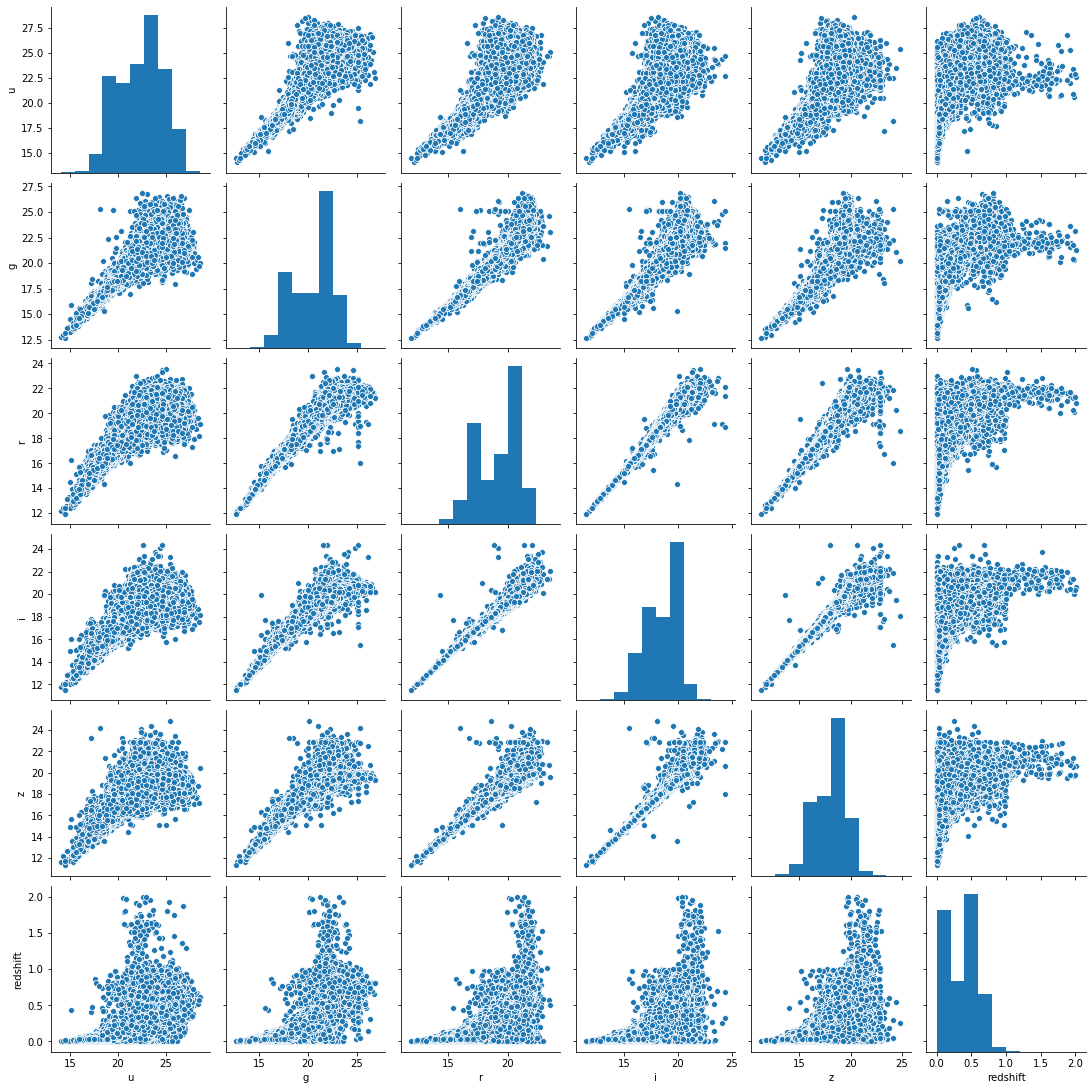

In [57]:
plt.figure(figsize=(10,10))
sns.pairplot(galaxies_reduced);
# check scatterplots again to see if they look better

Finally, I exported the cleaned data to a new file, [sdss_clean.csv](./data/sdss_clean.csv).

In [59]:
galaxies.to_csv("../data/sdss_clean.csv", index=False)
# index=False prevents creation of extraneous index column